In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon
import pingouin as pg

from sklearn.decomposition import FastICA
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

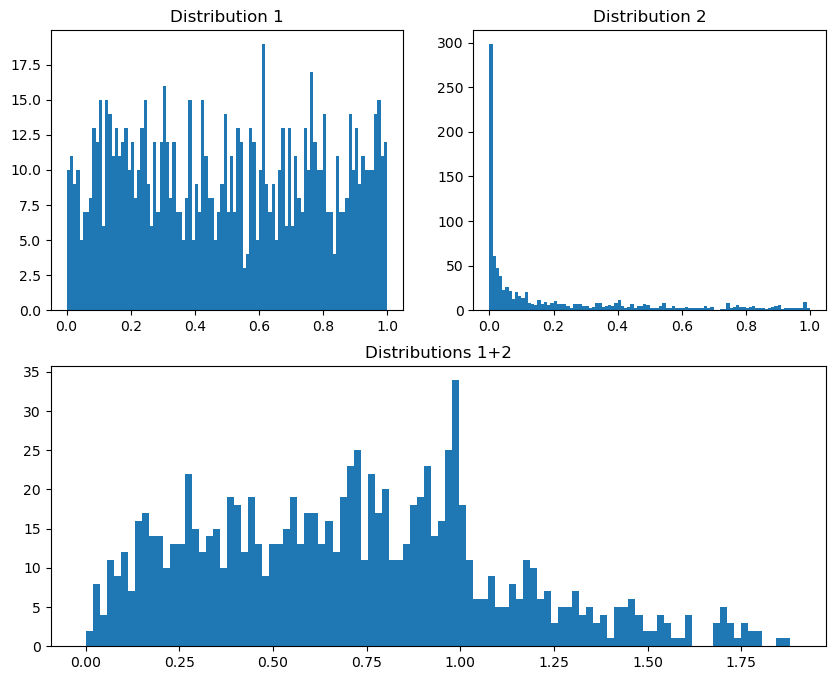

In [2]:
N = 1000

dist1 = np.random.rand(N)

dist2 = np.random.rand(N)**4

fig = plt.figure(constrained_layout=False,figsize=(10,8))
axs = fig.add_gridspec(2,2)


ax1 = fig.add_subplot(axs[0,0])
ax1.hist(dist1,100)
ax1.set_title('Distribution 1')

ax2 = fig.add_subplot(axs[0,1])
ax2.hist(dist2,100)
ax2.set_title('Distribution 2')

# and their summed histogram
ax3 = fig.add_subplot(axs[1,:])
ax3.hist(dist1+dist2,100)
ax3.set_title('Distributions 1+2')

plt.show()

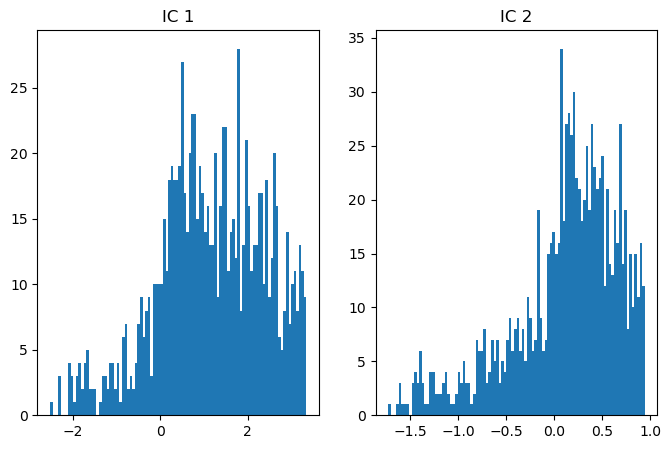

In [4]:
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))

fastica = FastICA(max_iter=1000,tol=.000001)
b = fastica.fit_transform(data)
iscores = b@data


fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].hist(iscores[0,:],100)
ax[0].set_title('IC 1')

# IC 2
ax[1].hist(iscores[1,:],100)
ax[1].set_title('IC 2')


plt.show()


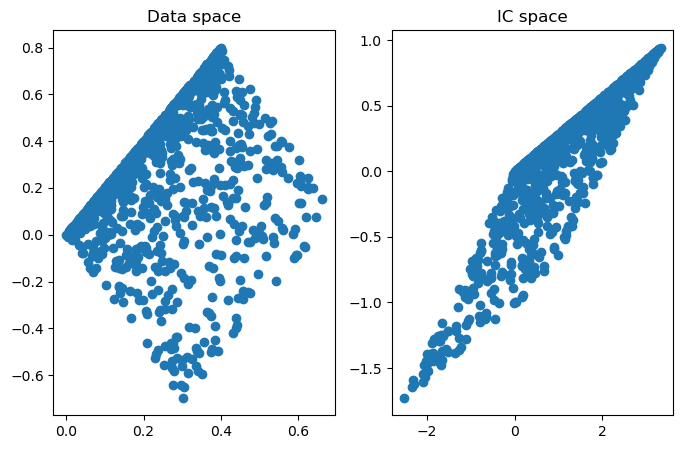

In [5]:
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(data[0,:],data[1,:],'o')
ax[0].set_title('Data space')

ax[1].plot(iscores[0,:],iscores[1,:],'o')
ax[1].set_title('IC space')
plt.show()

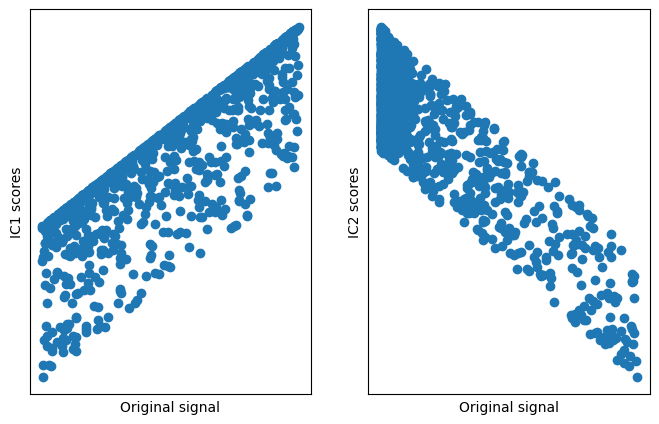

In [6]:
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(dist1,iscores[0,:],'o')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Original signal')
ax[0].set_ylabel('IC1 scores')

ax[1].plot(dist2,iscores[1,:],'o')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Original signal')
ax[1].set_ylabel('IC2 scores')
plt.show()